In [8]:
from jdna.database import *

In [14]:
tasks = aqapi.find('task', {'task_prototype_id':7})['rows']

In [33]:
S = []
L = []

for t in tasks[::-1]:
    spec = json.loads(t['specification'])
    keys = spec.keys()
    ids = []
    for k in keys:
        ids += spec[k]
    for id in ids:
        sample = aqapi.find('sample', {'id': id})['rows'][0]
        try:
            l = sample['fields']['Length']
            if l > 0:
                S.append(t['status'])
                L.append(l)
                print t['status'], l
        except Exception as e:
            print e
            print sample
            pass

ready 4000
done 1838
done 130
done 4000
done 353
failed 4407
done 3224
done 2587
done 5384
done 387
done 671
done 2500
done 2158
done 5072
done 2140
done 2140
done 3233
done 2000
done 4763
failed 4763
failed 2500
done 4763
failed 4763
done 2899
done 2899
done 245
done 4763
canceled 4763
done 6900
canceled 245
done 4407
done 353
done 4407
done 3224
failed 2587
failed 5384
done 387
canceled 1217
done 353
done 353
done 4407
done 3224
done 1200
done 2000
done 2000
done 400
done 2500
done 2000
done 1000
failed 1862
done 1800
done 359
failed 1862
done 3237
done 2587
failed 3972
done 2587
failed 3237
done 2557
done 245
failed 245
done 173
done 538
done 2500
done 2583
done 4222
done 2576
done 4231
done 538
done 1118
done 1468
done 3230
done 3607
done 1227
done 4535
done 234
done 3253
done 747
done 179
done 1257
done 5506
'Length'
{u'sample_type_id': 1, u'user_id': 85, u'name': u'STE12BindingSites_fwd', u'fields': {u'': None, u'T Anneal': 0, u'Overhang Sequence': None, u'Anneal Sequence': None}

IndexError: list index out of range

568 193


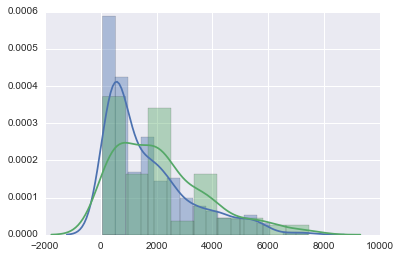

In [34]:
%matplotlib inline

g = zip(S, L)
done = filter(lambda x: x[0] == 'done', g)
failed = filter(lambda x: x[0] != 'done', g)
print len(done), len(failed)


import seaborn as sns

sns.distplot([x[1] for x in done])
sns.distplot([x[1] for x in failed])

In [37]:
len(failed)*1.0 / (len(g))

0.2536136662286465

In [40]:
allprimers = aqapi.find('sample', {'sample_type_id': 1})['rows']

error: (2, 'No such file or directory')

In [43]:
get_sample(allprimers[0]['id'])

/Users/klavinslab/anaconda/envs/python2/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


{u'created_at': u'2013-10-08T10:18:48-07:00',
 u'data': None,
 u'description': None,
 u'fields': {u'Anneal Sequence': u'ATGGAAGTCACCAATGGGCTTAACCTTAAG',
  u'Overhang Sequence': u'AAAAAGCAGGCTTCAAA',
  u'T Anneal': u'71.84'},
 u'id': 1,
 u'name': u'IAA1-Nat-F',
 u'project': u'Auxin',
 u'sample_type_id': 1,
 u'updated_at': u'2013-10-08T10:18:48-07:00',
 u'user_id': 1}

In [1]:
# UPDATE LIST OF PRIMERS

import os
from IPython import display
import json
from Bio.Seq import Seq
from Bio import SeqIO
import re

# Load current JSON file
primers = {}
fname = 'primers.json' 
if os.path.isfile(fname):
    with open(fname, 'rU') as inp:
        primers = json.load(inp)

print '{} current primers'.format(len(primers))

# Update JSON file
num_new = 0
for i, p_id in enumerate(primers):
    primer = primers[p_id]
    if str(primer['id']) not in primers:
        display.clear_output(wait=True)
        display.display(i, len(primers))
        if 'fields' in primer:
            if p['fields']['Anneal Sequence'] == '' or p['fields']['Anneal Sequence'] is None:
                p = get_sample(p['id'])
        num_new += 1
        primers[p['id']] = p
        
with open(fname, 'w') as output:
    json.dump(primers, output)
    
print "{} new primers".format(num_new)


valid_characters = ['AGTCagtc']



seqs = []
num_primers_loaded = 0
with open('../primers.fasta', 'w') as output:
    for p in primers.keys()[:100]:
        primer = primers[p]
        fields = primer['fields']
        ann = fields['Anneal Sequence']
        ov = fields['Overhang Sequence']
        if ov is None or ov == 'none':
            ov = ''
        if ann is None or ann == 'none' or ann == '':
            continue
        ann = ann.encode('utf-8').strip()
        ov = ov.encode('utf-8').strip()
        seq = ov + ann
        seq = re.sub('\s', '', seq)
        m = re.match('[agtcAGTC]+', seq)
        if m is not None:
            num_primers_loaded += 1
            output.write('>{} .\n{}\n'.format('{}__{}'.format(primer['id'], primer['name'].encode('utf-8')), seq))
print 'Dumped {} primers to json file'.format(num_primers_loaded)

5213 current primers
0 new primers
Dumped 98 primers to json file


In [39]:
import numpy as np
list('atgc')

['a', 't', 'g', 'c']

In [34]:
class P(object):

    def __init__(self,x):
        self.__x = x

    @property
    def x(self):
        return self.__x

    @x.setter
    def x(self, x):
        if x < 0:
            self.__x = 0
        elif x > 1000:
            self.__x = 1000
        else:
            self.__x = x
            
    @property
    def y(self):
        return 5+5

p = P(1010)
p.x += 100000
p.x

1000

1010